# Chapter 10 - Unsupervised Learning
The topics of this chapter are

- Principal Components Analysis
- Clustering Methods

## Principal Component Analysis
Principal Component Analysis (PCA) is a technique for unsupervised exploratory data analysis. It is used to reduce the dimensions of the observations' space so that the main components, represented as linear combinations of the original predictors, can be represented in a space of lower dimensions. If p is the number of predictors, we can represent the first principal component of the $i$th observation as 

$$z_{i1} = \phi_{11}x_{i1} + \phi_{21}x_{i2} + ... + \phi_{p1}x_{ip}$$

subject to the constraint

$$\sum_{j=1}^p \phi_{j1}^2 = 1$$

The coefficients $\phi_{j1}$ are called loadings. We assume that all variables $x_j$ are standardized so that they have standard deviation one and mean value zero 

$$\bar{x}_j = \frac{1}{n} \sum_{i=1}^n x_{ij} = 0$$

We want the first principal component $z_{1}$ to have the largest variance

$$Var(z_1) = \frac{1}{n} \sum_{i=1}^n (z_{i1} - \bar{z}_1)^2$$

This means that we have to maximize $Var(z_1)$. We can simplify the expression of the variance as follows

$$\bar{z}_1 = \frac{1}{n} \sum_{i=1}^n z_{i1} = \frac{1}{n} \sum_{i=1}^n \sum_{j=1}^p \phi_{j1} x_{ij} = \sum_{j=1}^p \phi_{j1} (\frac{1}{n} \sum_{i=1}^n x_{ij}) = \sum_{j=1}^p \phi_{j1} \bar{x}_j = 0$$

so that 

$$Var(z_1) = \frac{1}{n} \sum_{i=1}^n z_{i1}^2 = \frac{1}{n} \sum_{i=1}^n (\sum_{j=1}^p \phi_{j1} x_{ij})^2$$

and the problem to find the coefficients $\phi_{j1}$ that maximize the variance $Var(z_1)$ becomes

$$\frac{\partial}{\partial \phi_{k1}} Var(z_1) = \frac{2}{n} \sum_{i=1}^n (\sum_{j=1}^p \phi_{j1} x_{ij}) x_{ik} = 0$$

that is a system of p linear equations in $\phi_{j1}$ that can be solved with the [singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) technique.  

After we have found the first principal component, we can determine the second principal component as the direction that is orthogonal to the first principal component and that has the highest variance in this subspace, practically repeating the same procedure we have followed to compute the first principal component. A geometric interpretation of the first principal component is that it is the line that is the closest to the n observations. The first two principal components determine the plane that is the closest to the observations, and so forth. We can determine the first M < p principal components that represent the bulk of the variability of our observations. The proportion of variance captured by the $m$th principal component is represented by the ratio 

$$\frac{Var(z_m)}{ \sum_{j=1}^p Var(x_j)}$$


## Clustering Methods
There are two types of clustering methods: K-Means clustering and Hierarchical clustering. In K-Means clustering the number of clusters K must be specified in advance.
We want the distances between observations within each cluster 

$$W(C_k) = \frac{1}{|C_k|} \sum_{i,i' \in C_k} \sum_{j=1}^p (x_{ij} - x_{i'j})^2$$

such that

$$\sum_{k=1}^K W(C_k)$$

is minimized. Each observation belongs to only one of the non-overlapping clusters.

In hierarchical clustering the number of classes is not specified in advance. The process starts by assigning to each observation its own cluster and then by fusing pairs of closest clusters. The process is repeated till all clusters are fused into a single one. The process can be represented as a dendrogram, a tree-like structure that is built bottom-up from the observations to the root that represents the fusion of all the observations in one single cluster. Different methods of computing the dissimilarity measures between clusters can be implemented and different metrics, such as euclidean metrics and correlation, can be used. It depends on the problem at hand to choose which level of the dendrogram, and as a consequence the number of clusters, is most effective in representing the structure of the observations.

### 10.4 Principal Component Analysis
We wil perform PCA on the USArrests data set. The data set contains the number of four types of crimes in each state of the US.

In [2]:
names(USArrests); dim(USArrests)

[1] "Murder"   "Assault"  "UrbanPop" "Rape"

[1] 50  4

In [3]:
apply(USArrests, 2, mean) # applies the mean() function to the columns (margin 2, 1 for rows) of the USArrests data set

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

In [4]:
apply(USArrests, 2, var) # applies the var() function to compute the variance

Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

We see a huge difference in the values because of the different units used. We use the prcomp() to perform PCA and we set the scale argument to true to standardize the variables' standard deviation to remove the effect due to the different units of measure used for each of them. We can see the proportion of the variance captured by each principal component.

In [5]:
pr.out <- prcomp(USArrests, scale = TRUE)
summary(pr.out)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.5749 0.9949 0.59713 0.41645
Proportion of Variance 0.6201 0.2474 0.08914 0.04336
Cumulative Proportion  0.6201 0.8675 0.95664 1.00000

We can also see the loadings of each principal component.

In [6]:
pr.out$rotation

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


The three crimes reported equally contribute to the first principal component that can be interpreted as a predictor for crimes.

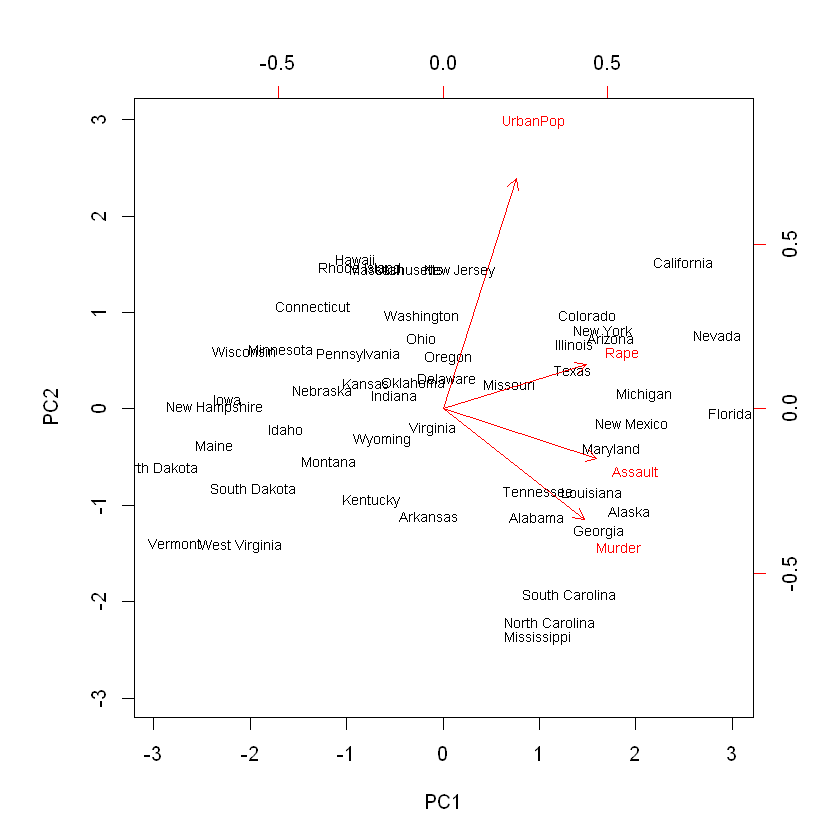

In [9]:
pr.out$rotation <- - pr.out$rotation
pr.out$x <- - pr.out$x
biplot(pr.out, scale = 0, cex = 0.7)

We now work out an exercise. We have a data set of 300 observations with 200 predictors with labes y. We have also a test set of 1000 labelled observations. We want to see whether we can use less predictors while keeping the bulk of the variance in the data. We start by loading the data, concatenating all the observations, and computing the principal components.

In [96]:
load("data/10.R.RData") # we load the 300x200 'x' matrix with its labels 'y' and the 1000x200 'x.test' matrix with its labels 'y.test'
x.bind <- rbind(x, x.test)
pr.out <- prcomp(x.bind, scale = TRUE)

The principal components object, pr.out, contains the standard deviations of all the 200 principal components. We want to compute the proportion of the variance of the first five principal components to see whether they capture the bulk of it. We first compute the variance, then we compute the total variance and finally we compute the proportion of the variance of the first 5 principal components. 

In [97]:
variance <- (pr.out$sdev)^2
total_variance <- sum(variance)
prop_variance_5 <- sum(variance[1:5]) / total_variance
prop_variance_5

[1] 0.3498565


We see that 35 % of the variance is captured by the first 5 principal components. Now we want to see what could be the mean squared error on the test set if we fit a linear into the 5-dimensional space of the first five principal components. We have to map the train observation x into z using the first 5 loadings

In [126]:
phi_5 <- t(pr.out$rotation[, 1:5])
x_transpose <- t(x)
z <- t(phi_5 %*% x_transpose)
x.test_transpose <- t(x.test)
z.test <- t(phi_5 %*% x.test_transpose)
dat <- data.frame("y" = y, "z" = z)
dim(z.test)

[1] 1000    5

Now we fit a linear model using the transformed training data and then we compute the predictions using the transformed test data such that we will be able to compute the mean squared error.

In [147]:
fit <- lm(y ~ z, data = dat)
summary(fit)


Call:
lm(formula = y ~ z, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3004 -0.6899  0.0311  0.8082  2.5320 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.101474   0.061353   1.654 0.099205 .  
zPC1         0.057576   0.008625   6.675 1.23e-10 ***
zPC2        -0.018521   0.010013  -1.850 0.065352 .  
zPC3        -0.031111   0.011903  -2.614 0.009417 ** 
zPC4        -0.051695   0.017941  -2.881 0.004252 ** 
zPC5        -0.134176   0.035585  -3.771 0.000197 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.056 on 294 degrees of freedom
Multiple R-squared:  0.1912,	Adjusted R-squared:  0.1775 
F-statistic:  13.9 on 5 and 294 DF,  p-value: 3.341e-12


In [143]:
z.test_df <- data.frame("z" = z.test)


### 10.5 Clustering

### NCI-60 Data Example
[paper](https://www.pnas.org/content/pnas/100/14/8418.full.pdf)